In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
method = "cumulative0.3_stop=0.95"

path = "../training/" + method + "/";
path

'../training/cumulative0.3_stop=0.95/'

In [3]:
single_dkl = open(path + "single_dkl.txt","r")
total_dkl = open(path + "total_dkl.txt", "r")
lines1 = single_dkl.readlines()[2 : ]
lines2 = total_dkl.readlines()[2 : ]  

lines3 = []
for i in range(4,3904,100):
    picture = open(path + "single_contribs_step" + str(i) + ".txt", "r")
    lines3.append(picture.readlines()[ : -1]  )

iterations = open(path + "iterations.txt", "r")
lines4 = iterations.readlines()[2 : ]

In [4]:
def read_iteration(lines4):
    iteration_stat = []
    for line in lines4[: -1]:
        line = line.split(" ")[ : -1]
        for i in range(0,len(line)):
            line[i] = float(line[i])
        iteration_stat.append(line)

    matrix_stat = np.zeros((len(iteration_stat), len(iteration_stat[1])))
    for i in range(len(iteration_stat)):
        for j in range(len(iteration_stat[i])):
            matrix_stat[i, j] = iteration_stat[i][j]
    return     matrix_stat 

def str2array_for_matrices(lines, every_five=False):
    """

    """
    x = []
    for line in lines[0:-1]:
        line = line[1:-2]
        line = line.split(", ")
        for i in range(0,len(line)):
            line[i] = float(line[i])
        x.append(line)

    if every_five == False:
        last_line = lines[-1][1:-1].split(", ")
        for i in range(0,len(last_line)):
            last_line[i] = float(last_line[i])
        x.append(last_line)
        return x
    else:
        last_line = lines[-1][1:-2].split(", ")
        for i in range(0,len(last_line)):
            last_line[i] = float(last_line[i])
        x.append(last_line)
        return x

def str2array_for_full(lines):
    """

    """
    y = []
    for line in lines:
        y.append(float(line))
    return y

def dkl_ave(dkls):
    """

    """
    tot = 0
    for dkl in dkls:
        #print("dkl ", dkl)
        dkl = np.array(dkl)
        fi = - np.sort(-dkl)/ sum(dkl)
        tot += fi
    tot /= len(dkls)
    return tot

In [5]:
matrix_stat = read_iteration(lines4)

all_steps_single_dkl = str2array_for_matrices(lines1)
all_steps_full_dkl = str2array_for_full(lines2)

every_five_single_dkl = []
for five_lines in lines3:
    every_five_single_dkl.append(str2array_for_matrices(five_lines, every_five=True))

all_steps_sum_single_dkl = []
for i in all_steps_single_dkl:
    all_steps_sum_single_dkl.append(sum(i))

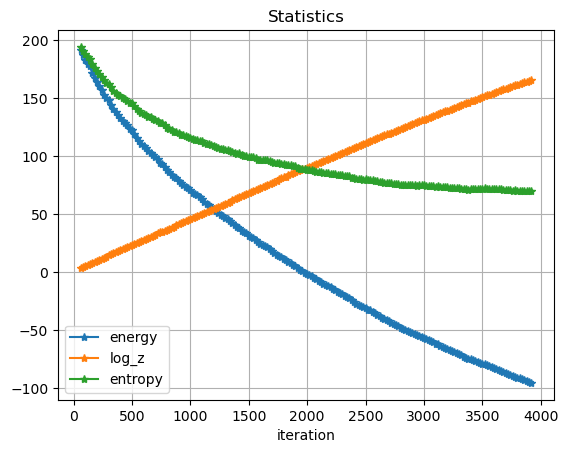

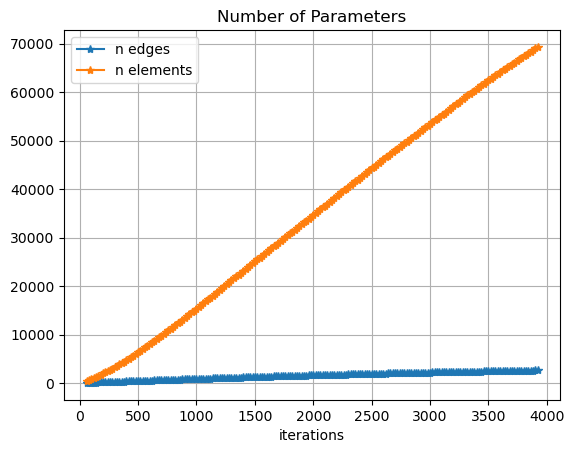

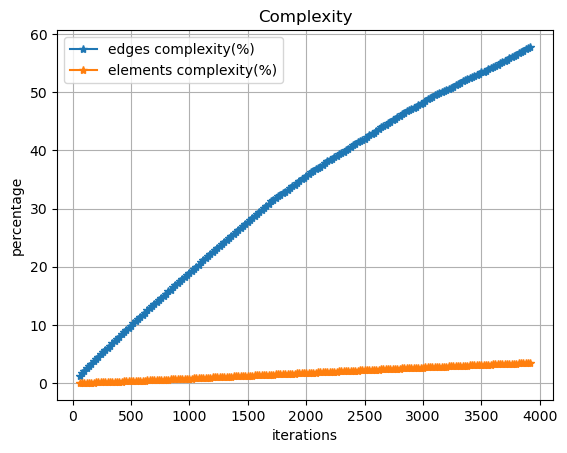

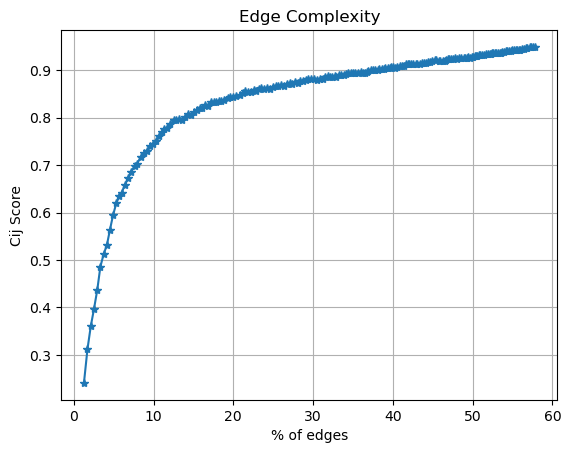

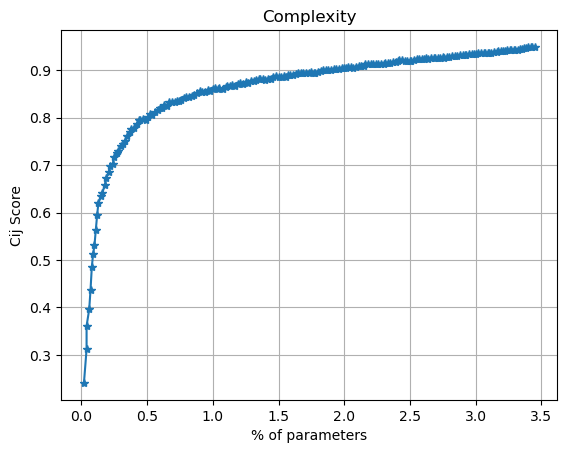

In [6]:
iter            = matrix_stat[:, 0]
energy          = matrix_stat[:, 1]
log_z           = matrix_stat[:, 2]
entropy         = matrix_stat[:, 3]
score           = matrix_stat[:, 4]
n_edges         = matrix_stat[:, 5]
n_elements      = matrix_stat[:, 6]
edge_complex    = matrix_stat[:, 7]
element_complex = matrix_stat[:, 8]

plt.plot(iter, energy,"-*", label="energy")
plt.plot(iter, log_z,"-*", label="log_z")
plt.plot(iter, entropy,"-*", label="entropy")
plt.grid("True")
plt.legend()
plt.title("Statistics")
plt.xlabel("iteration")
plt.show()



plt.plot(iter, n_edges,"-*", label="n edges")
plt.plot(iter, n_elements,"-*", label="n elements")
plt.grid("True")
plt.legend()
plt.title("Number of Parameters")
plt.xlabel("iterations")
plt.show()



plt.plot(iter, edge_complex,"-*", label="edges complexity(%)")
plt.plot(iter, element_complex,"-*", label="elements complexity(%)")
#plt.plot(iter, entropy,"-*", label="entropy")
plt.grid("True")
plt.legend()
plt.title("Complexity")
plt.xlabel("iterations")
plt.ylabel("percentage")
plt.show()

plt.plot(edge_complex, score, "-*")
plt.grid("True")
plt.title("Edge Complexity")
plt.xlabel("% of edges")
plt.ylabel("Cij Score")
plt.show()

plt.plot(element_complex, score, "-*")
plt.grid("True")
plt.title("Complexity")
plt.xlabel("% of parameters")
plt.ylabel("Cij Score")
plt.show()

### Correlations:

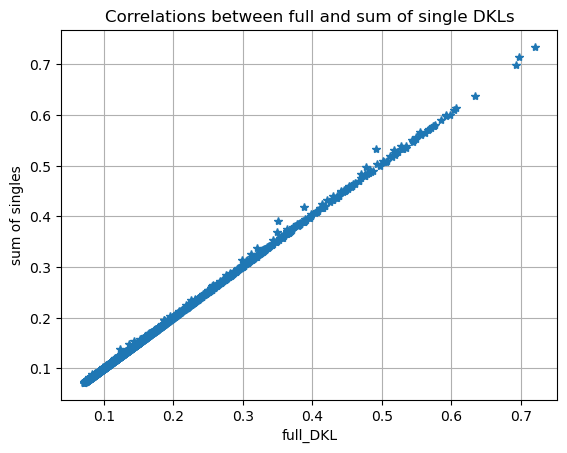

In [7]:
plt.plot(all_steps_full_dkl, all_steps_sum_single_dkl, "*")
plt.grid("True")
plt.title("Correlations between full and sum of single DKLs")
plt.xlabel("full_DKL")
plt.ylabel("sum of singles")
plt.show()

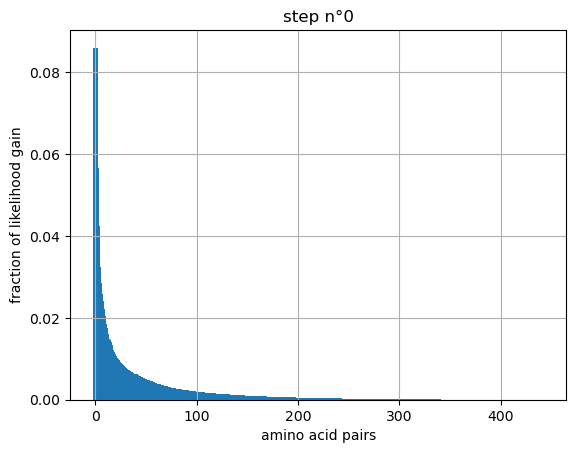

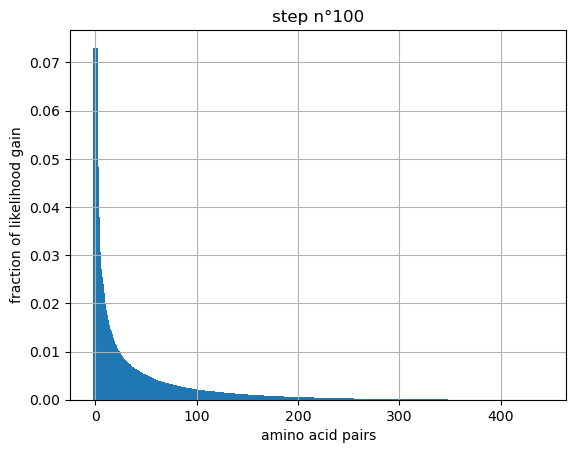

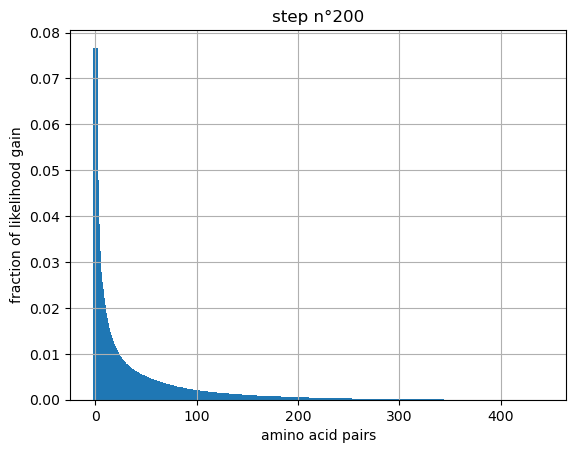

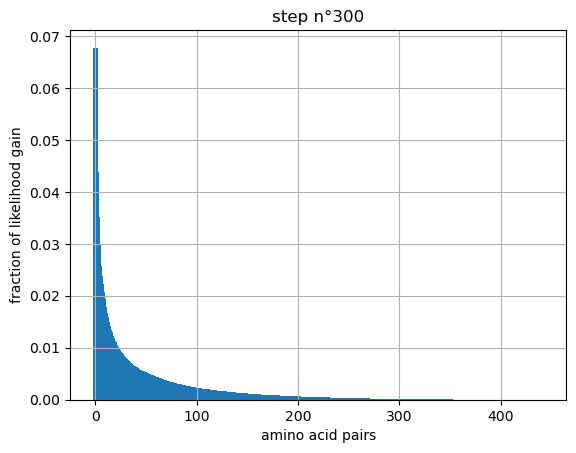

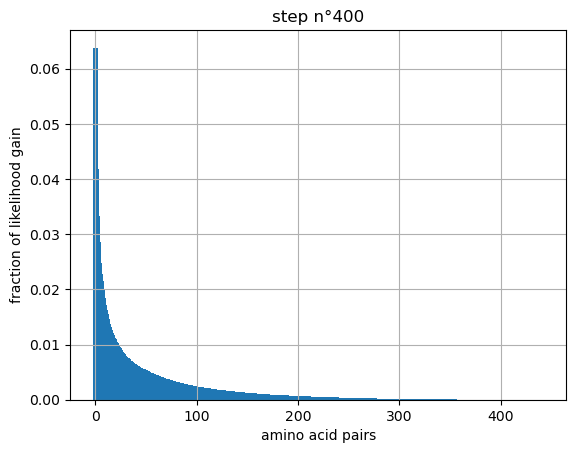

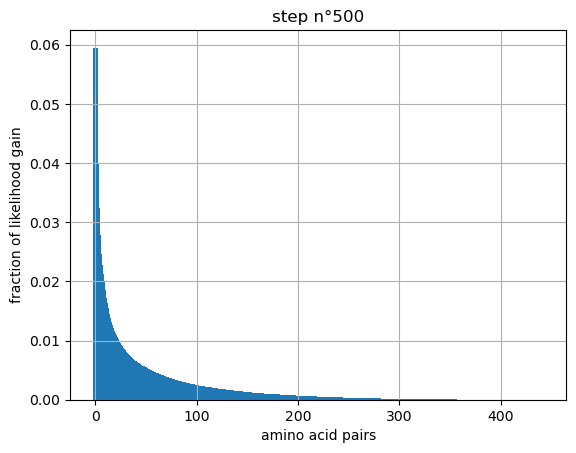

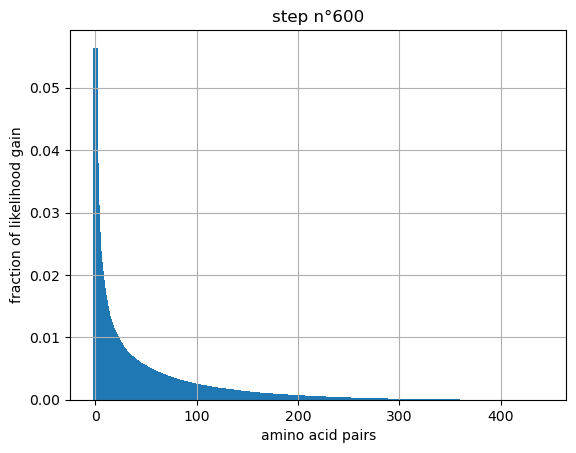

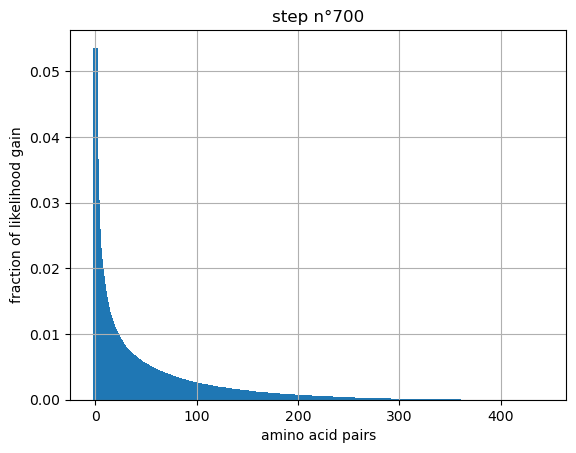

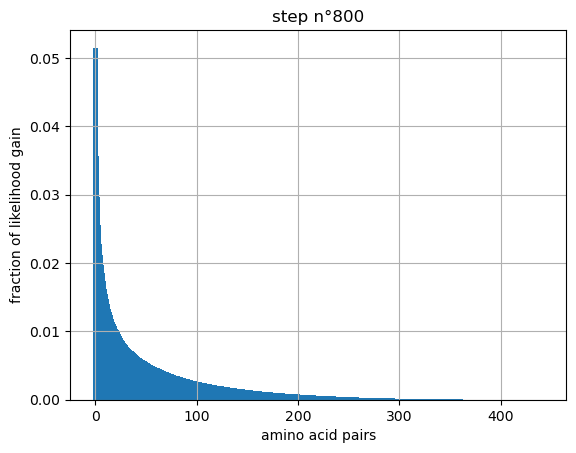

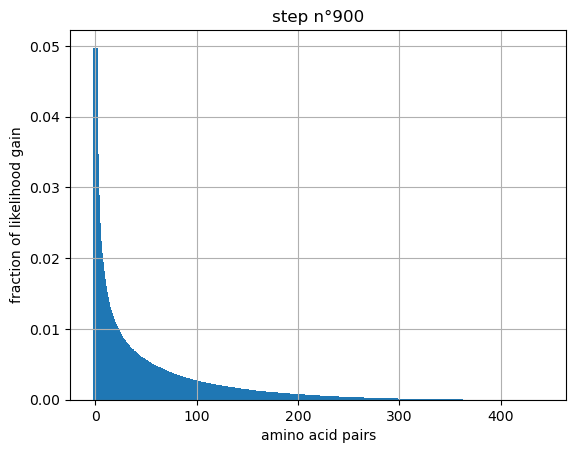

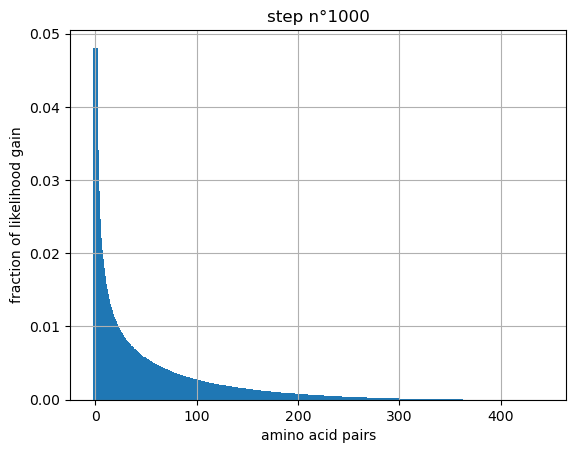

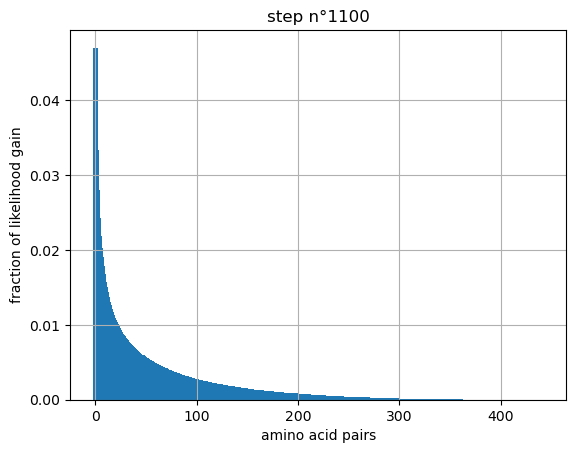

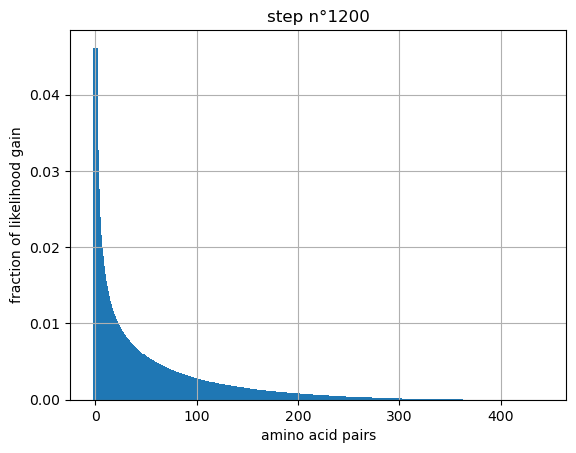

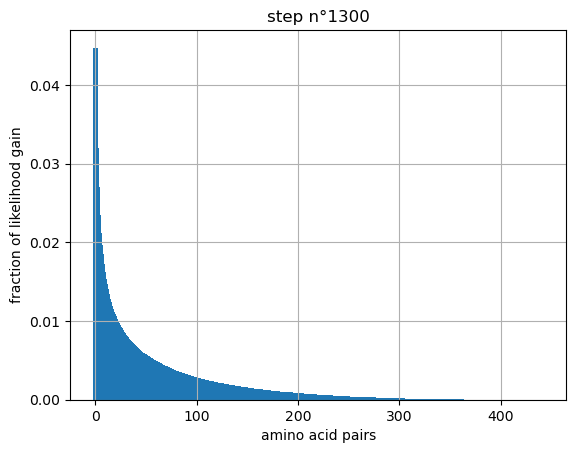

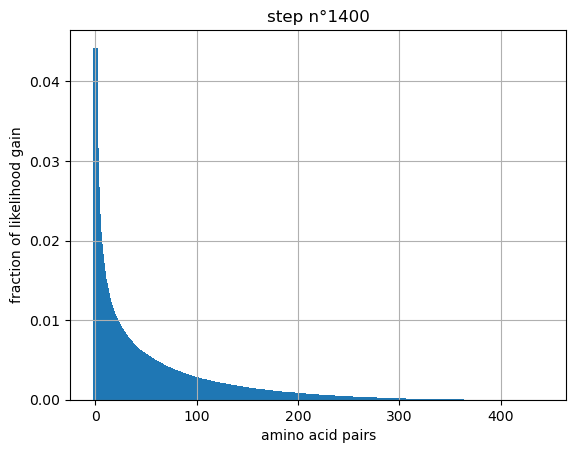

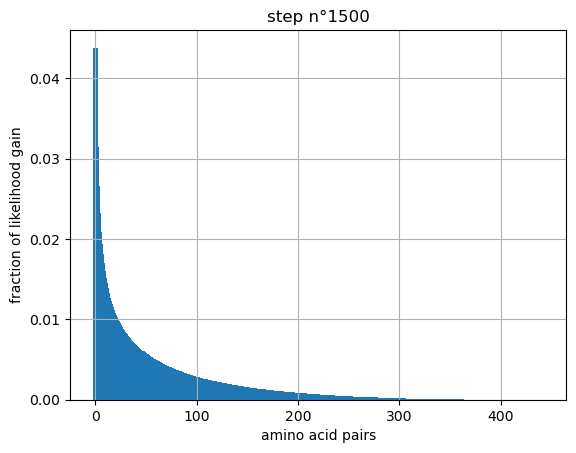

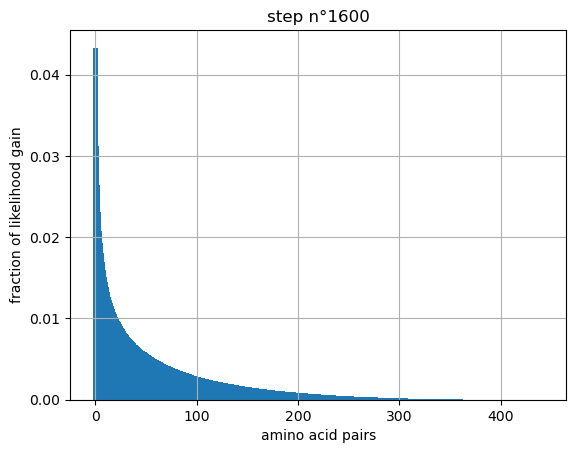

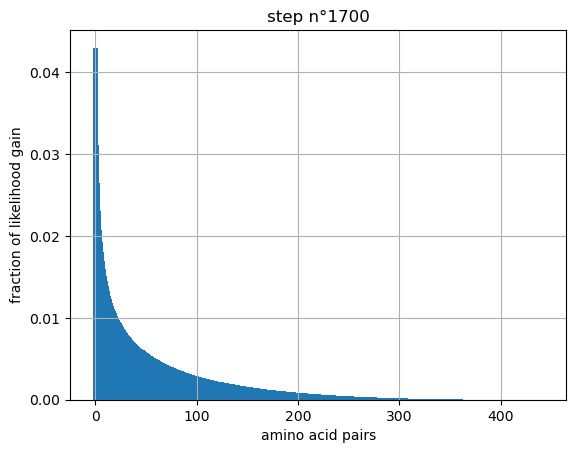

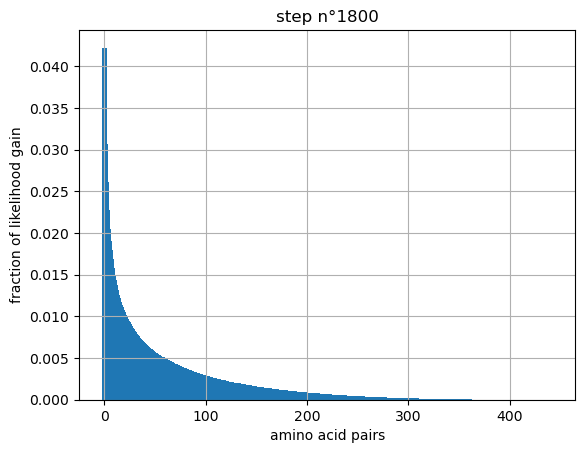

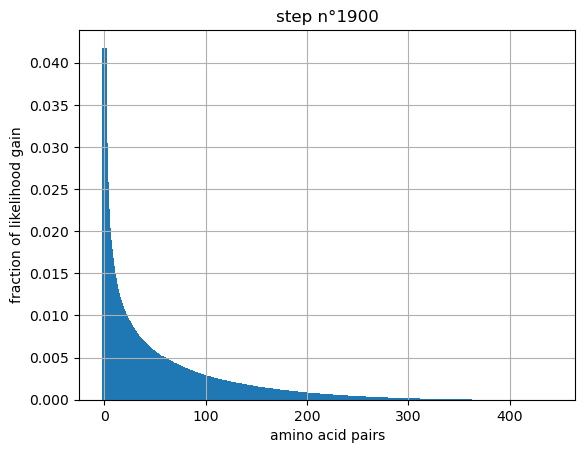

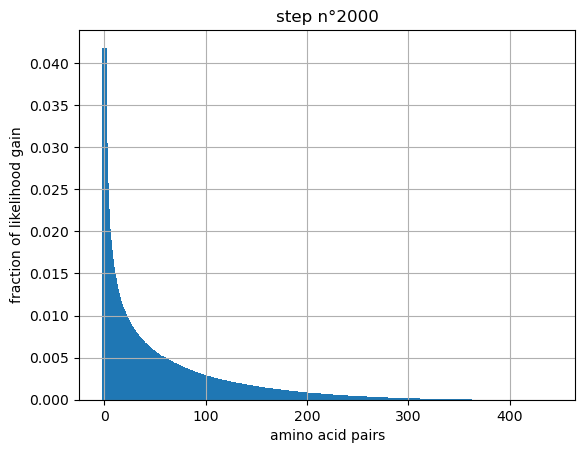

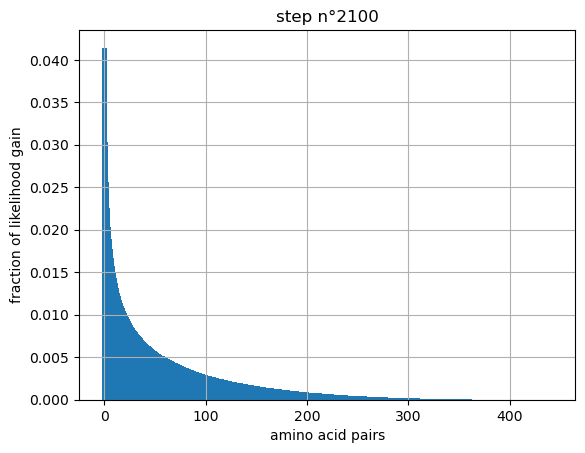

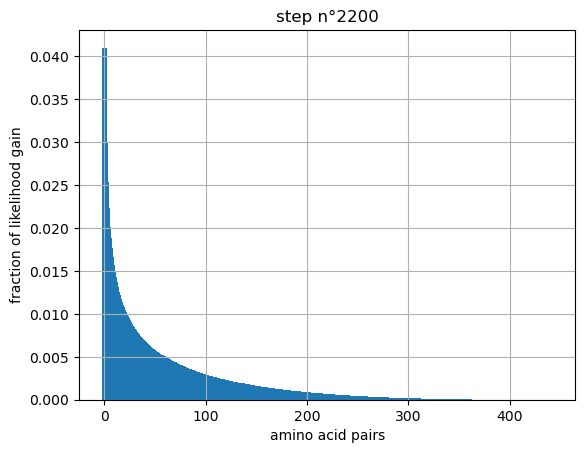

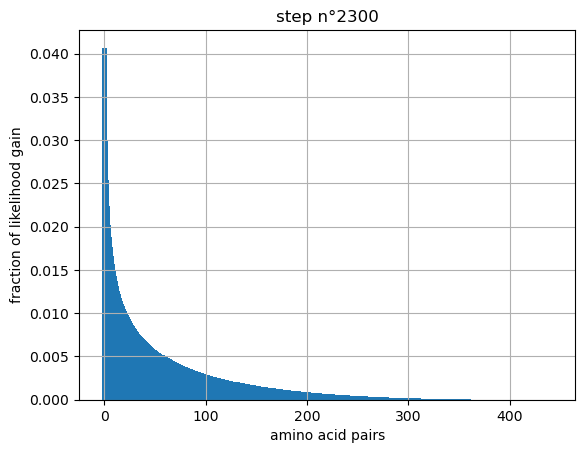

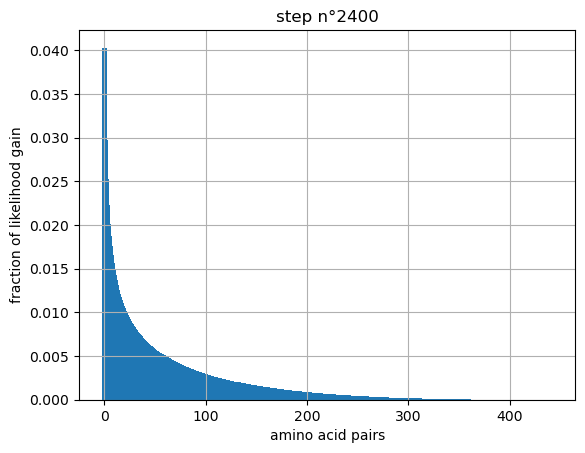

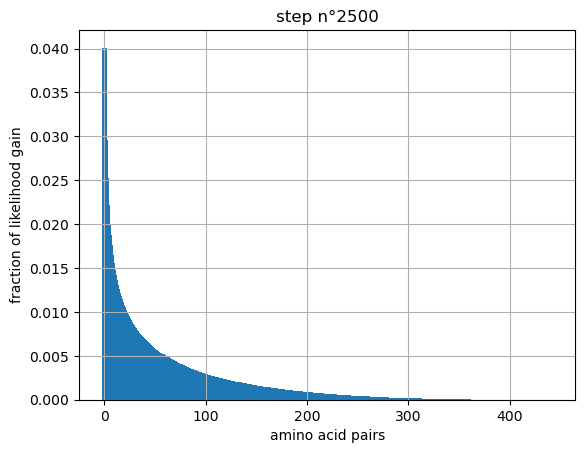

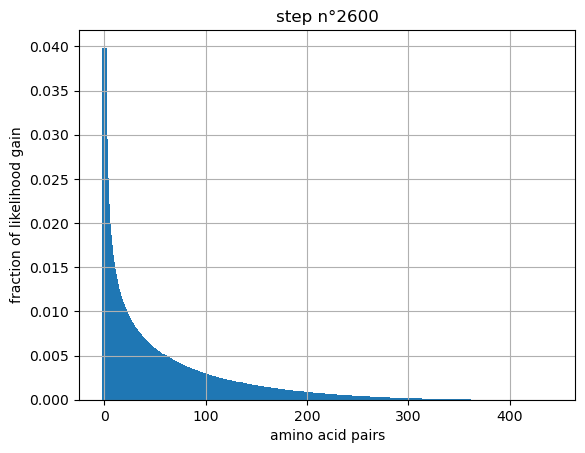

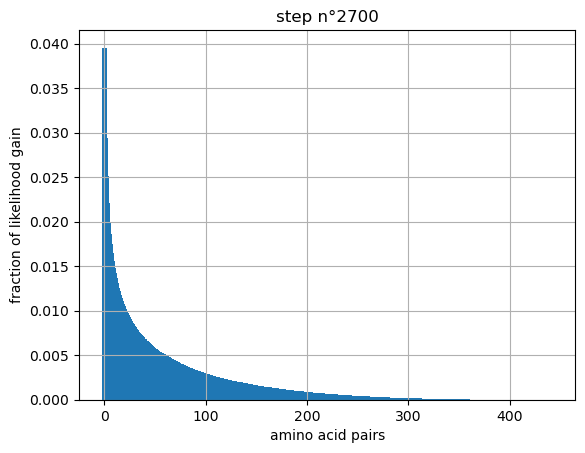

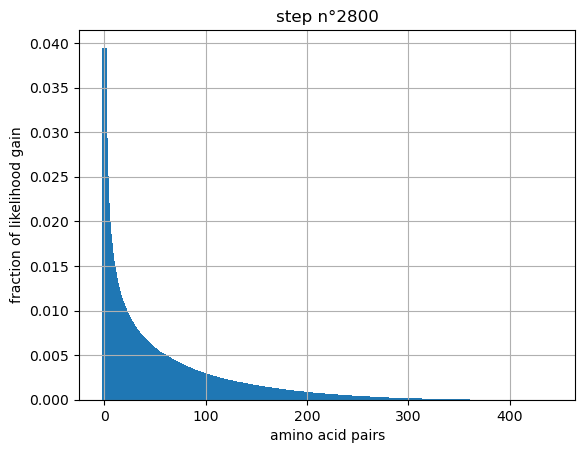

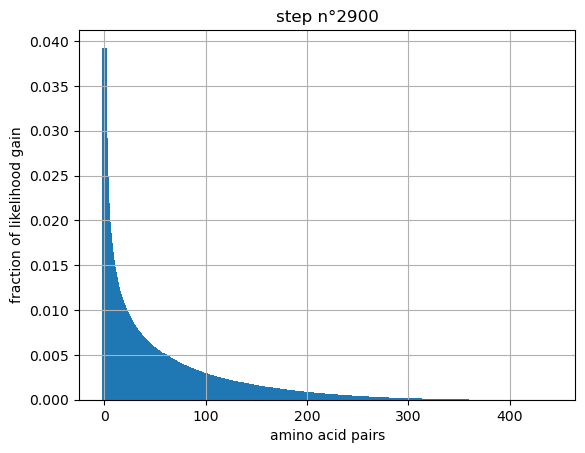

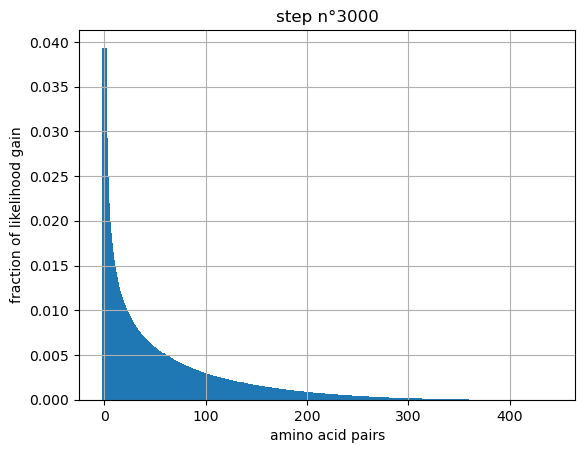

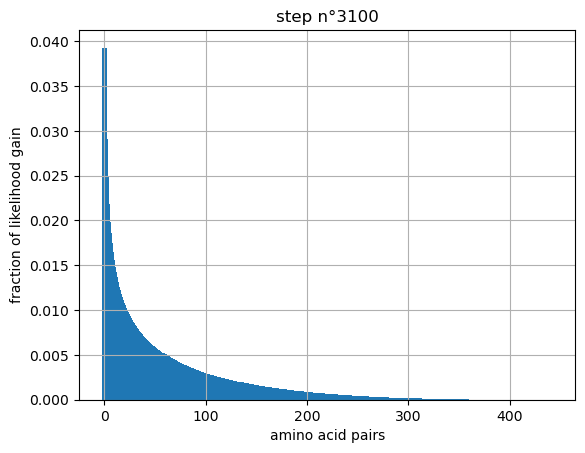

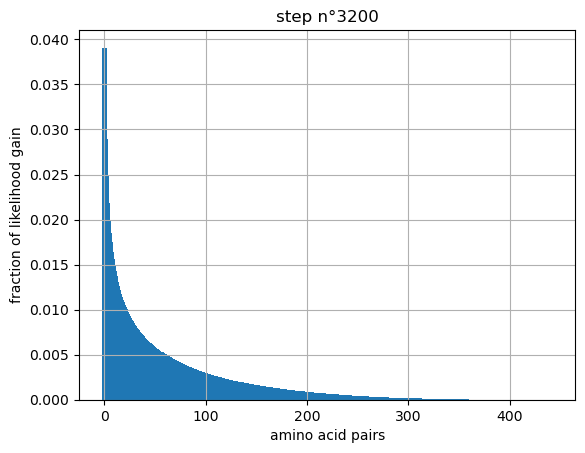

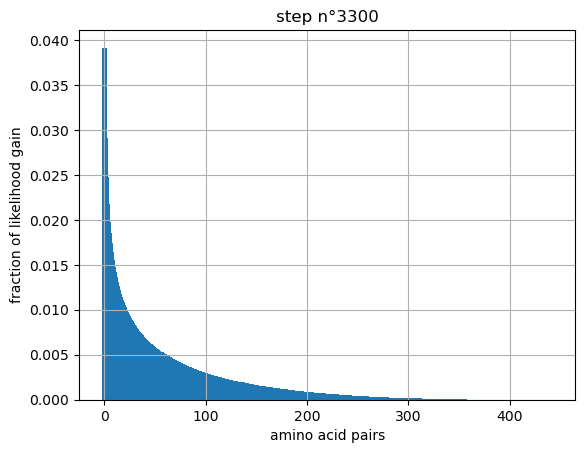

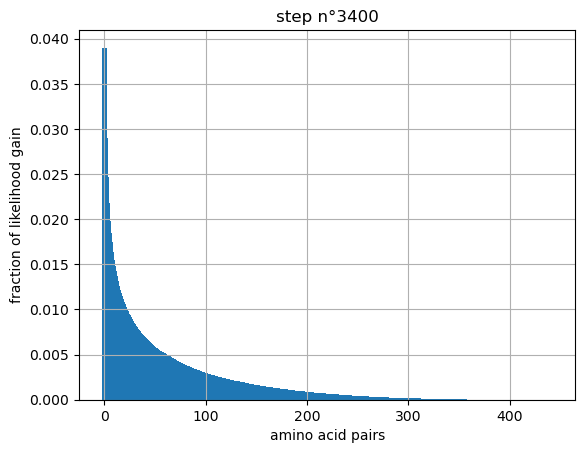

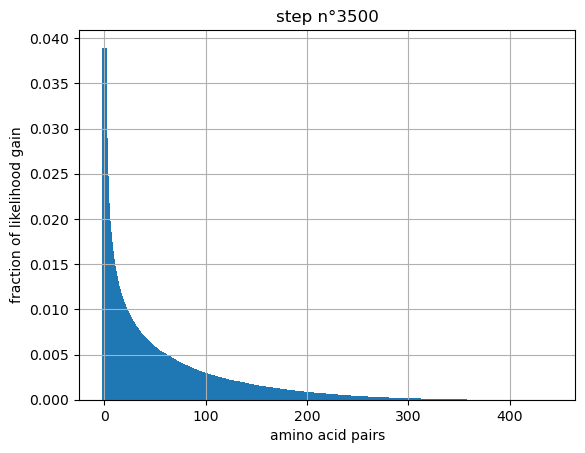

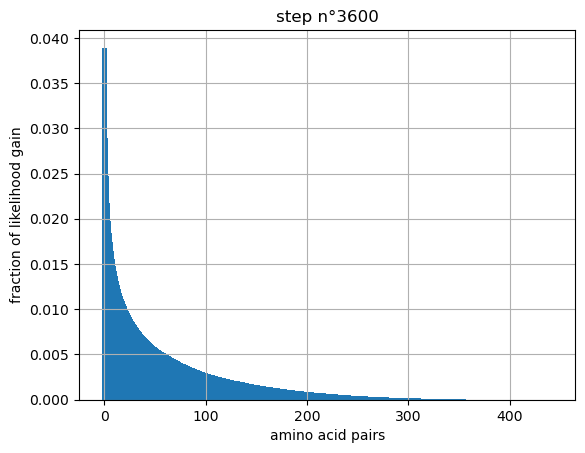

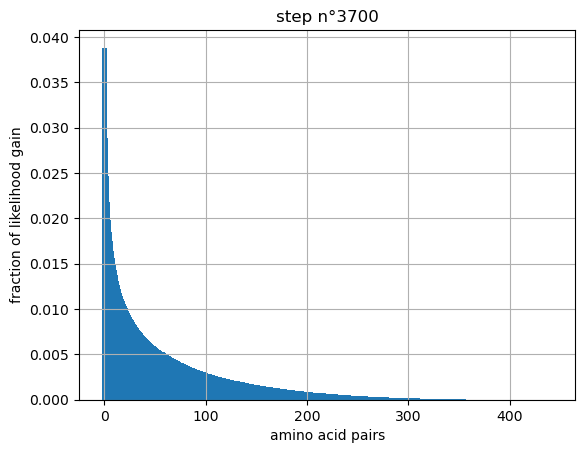

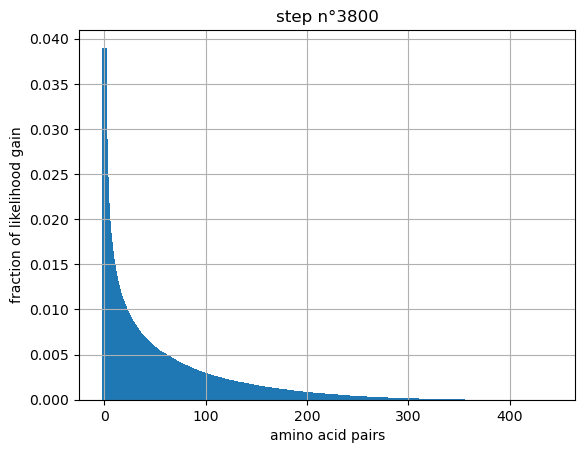

In [8]:
count = 0
for step in every_five_single_dkl:  
    ave = dkl_ave(step)
    plt.bar(range(0,441), ave, 5)
    plt.xlabel("amino acid pairs")
    plt.ylabel("fraction of likelihood gain")
    plt.title("step n°"+str(count))
    plt.grid()
    count += 100
    plt.show()